# Criterio de estabilidad de Bode

Sea el sencillo bucle de retroalimentación de la figura [\[fig:crit_bode\]](#fig:crit_bode){reference-type="ref" reference="fig:crit_bode"}. La función de transferencia de lazo abierto de este bucle es:

$$G_{OL} = K$$

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Bucle de retroalimentación con un controlador proporcional de ganancia unidad.
```

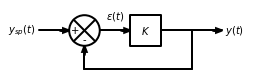

In [6]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)


d += dsp.Arrow().label('$y_{sp}(t)$', 'left')
d += (sum := dsp.Mixer(W="+", S="-").anchor('W'))
d += dsp.Arrow().label('$\epsilon(t)$', 'top').right()
d += (proc := dsp.Box(h=1, w=1).anchor("W").label("$K$", "center"))
d += dsp.Line().right().at(proc.E)
d += dsp.Dot(radius=0)
d.push()
d += dsp.Arrow().right().label("$y(t)$", "right")
d.pop()
d += dsp.Line().down().length(1.25)
d += dsp.Line().left().tox(sum.S)
d += dsp.Arrow().up().to(sum.S)

d.draw()

El criterio de estabilidad de Bode se basa en abrir el bucle e introducir una función sinusoidal para poder estudiar el comportamiento del sistema. En primer lugar se abre el bucle y se introduce una señal sinusoidal de amplitud *M* y frecuencia angular $\omega$:

$$y_{sp}(t) = \varepsilon (t) = M \sin \omega t$$

Por tanto, $$y (t) = K M \sin \omega t$$ ya que,

$$y (s) = G_{OL} y_{sp} (s)$$

Una vez introducida la señal sinusoidal se cierra el bucle y se devuelve la consigna a su valor inicial $y_{sp} = 0$. Entonces, $$\varepsilon (t) = - K M \sin \omega t = K M \sin (\omega t - 180^{\circ})$$

De esta manera se ha logrado atrapar la señal sinusoidal dentro del bucle de retroalimentación. Esta señal tiene un desfase de -180 y una amplitud que depende de la ganancia *K*. Se puede comprobar fácilmente que la razón de amplitudes de la función de la transferencia de lazo abierto ($G_{OL}$), entre la entrada $\varepsilon (t)$ y la salida $y (t)$, es *K*:

$$\mathrm{RA} = \frac{\text{Amplitud de la respuesta}}{\text{Amplitude de la entrada}} = \frac{K^2 M}{KM} = K$$

Se puede comprobar de manera muy sencilla que si la razón de amplitudes de lazo abierto es superior a la unidad ($K > 1$) el sistema será inestable ya que para cada vuelta del bucle la señal se ve amplificada. Si $K = 1$, el sistema se encontrará al límite de la estabilidad. Si $\mathrm{RA} < 1$, la respuesta del sistema global tenderá a cero cuando el tiempo tienda a infinito. Este razonamiento es la base del *criterio de estabilidad de Bode*:

```{important}
Un bucle de control por retroalimentación es inestable si la razón de amplitudes de su función de transferencia de lazo abierto es mayor que la unidad en la frecuencia de cruce $\omega_{co}$ (*crossover frequency*, aquella que hace que el desfase sea -180).
```

```{figure} ./img/est_bode.svg
---
name: est_bode
figclass: margin-caption
---
Aplicación del criterio de estabilidad de Bode. Según el valor de $K$ la respuesta de lazo cerrado será o no estable.
```

Para aplicar el criterio de Bode es necesario disponer de los diagramas de Bode de la función de transferencia de lazo abierto del bucle. Estos diagramas se pueden construir:

1.  Numéricamente: Conociendo las funciones de transferencia de todos los elementos del bucle.

2.  Experimentalmente, en el caso de que todas o alguna de las funciones de transferencia sea desconocida: Para ello se abre el lazo de control y se introducen señales sinusoidales de distintas frecuencias mientras se registran las amplitudes y desfase de las señales sinusoidales de salida. Con esos datos se puede construir el diagrama de Bode.

Tal como se ha visto el criterio de estabilidad de Bode se puede utilizar para sistemas intratables con las técnicas anteriores:

1.  Sistemas con función de transferencia compleja

2.  Sistemas de los que no se conoce la función de transferencias.

Además proporciona más información para realizar una correcta sintonía del controlador. Aunque también existen sistemas para los que no es aplicable el criterio de estabilidad de Bode.

## Márgenes de ganancia y de fase

El criterio de estabilidad de Bode indica cómo establecer un método racional de sintonía de sistemas de control por retroalimentación para evitar situaciones de inestabilidad.

Para aplicar el criterio de estabilidad hay que dibujar los diagramas de Bode de la función de transferencia de lazo abierto. En el diagrama se consideran dos puntos críticos según el criterio de Bode ($\mathrm{RA} = 1$ y $\varphi = - 180^{\circ}$).

Según la figura [\[fig:margenes\]](#fig:margenes){reference-type="ref" reference="fig:margenes"}, *M* es la razón de amplitudes para la frecuencia de cruce. Según el criterio de Bode, *M* debe ser menor o igual a 1 para que el sistema sea estable.

```{figure} ./img/margenes.svg
---
name: margenes
figclass: margin-caption
---
Representación gráfica del margen de ganancia y de fase.
```

Se puede definir:

$$\text{Margen de ganancia} = \frac{1}{M}$$ 

Lógicamente debe tomar valores por encima de la unidad para que el sistema sea estable.

El margen de ganancia es una medida importante del sistema ya que:

1.  Constituye una medida de la proximidad del sistema de la zona de inestabilidad.

2.  Cuanto mayor de la unidad sea el margen de ganancia, más seguro será el sistema controlado.

3.  Normalmente se diseñan los controladores para que el margen de ganancia sea mayor de 1.7. Es decir, la razón de amplitudes puede crecer 1.7 veces antes de que el sistema se vuelva inestable. Aunque en el caso de trabajar con procesos muy conocidos puede ser suficiente seleccionar un margen de ganancia entre 1.4 y 1.7. Si los parámetros del sistema son poco conocidos, se recomienda un factor de seguridad entre 1.7 y 3.0.

Además del margen de ganancia se puede establecer otro factor de seguridad:

$$\text{Margen de fase} = 180^{\circ} - |\varphi_{(1)}|$$

donde $\varphi_{(1)}$ es el desfase para $\mathrm{RA} = 1$. El margen de fase representa en cuanto hay que aumentar el desfase para inestabilizar el sistema. Se recomienda normalmente valores mayores de 30.